![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Business Analytics

## 14 August 2021

## Statistics 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('cars_datasets.csv')

In [3]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
#Removing the unnamed: 0 column

data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
#Exploring the dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [6]:
#checking dimension of dataset

data.shape

(2499, 12)

<AxesSubplot: >

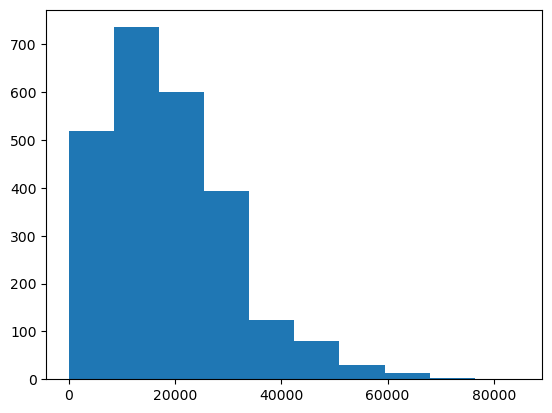

In [7]:
#importing library for visualizing dataset and plotting the  histogram for  price attributes

import seaborn as sns

data['price'].hist(grid = False)

In [8]:
# Checking the skewness of Price column of dataset

data['price'].skew()

0.9227307836499805

/tmp/ipykernel_141/874111300.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], hist = True)


<AxesSubplot: xlabel='price', ylabel='Density'>

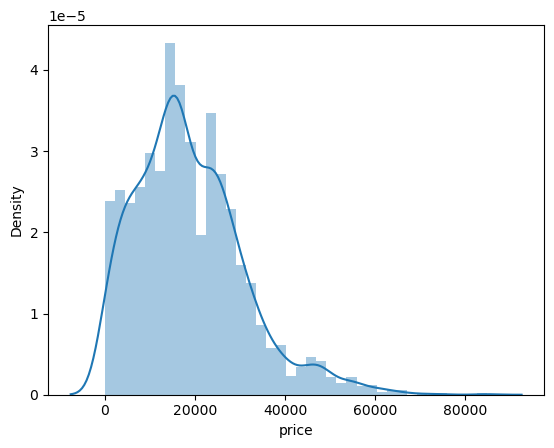

In [9]:
#density plot

sns.distplot(data['price'], hist = True)

Note: As we can see the skewed values lies between the 0.5 to 1 range. so, data is moderately skewed and right skewed(but it’s fine to train the model with it). Let’s explore another attribute.

In [10]:
# checking the skewness of mileage column of dataset

data['mileage'].skew()

7.0793210165347915

/tmp/ipykernel_141/1388293605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mileage'], hist = True)


<AxesSubplot: xlabel='mileage', ylabel='Density'>

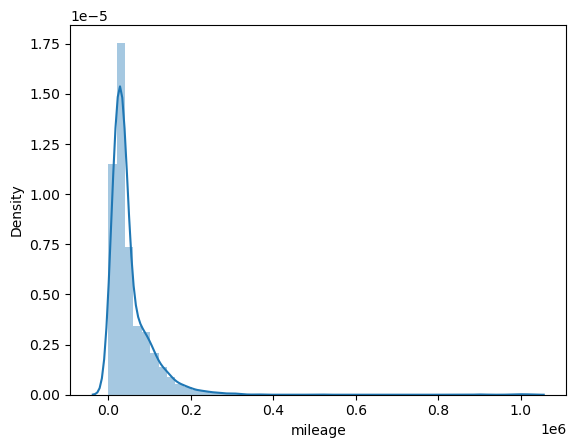

In [11]:
sns.distplot(data['mileage'], hist = True)

Note: As we can see the skewed values lies between -1 and greater than +1 then our data is heavily skewed. so, data is heavily skewed. data[‘mileage’] is right-skewed by looking at the graph and skewed values.

**How to handle these skewed data?**

# Let's start with Right Skewness

#### Transformation

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of distribution or relationship.

#### Log Transformation

In [12]:
#performing the log transformation using numpy

log_mileage = np.log(data['mileage']) 
log_mileage.head(5)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    12.521310
1    12.157680
2    10.586332
3    11.068917
4     8.802973
Name: mileage, dtype: float64

In [13]:
#checking the skewness after the log-transformation

log_mileage.skew()

nan

**Replace all your 0 values to 0.01 or 0.001**

It’s giving us nan because there are some values as the zero. In log transformation, it deals with only the positive and negative numbers, not with zero. The log is the range in between (- infinity to infinity) but greater or less than zero. For better understanding you can check the log graph below:

Note: If you are getting zeros inside the data, refer to root Transformation.

#### Root Transformation

The square root means x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape. it is weaker than the logarithm and the cube root.

It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values. Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

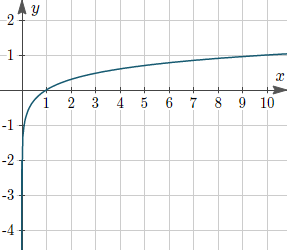

In [15]:
#calculating the square root for data[‘mileage’] column

sqrt_mileage = np.sqrt(data['mileage'])

In [16]:
sqrt_mileage.head(5)

0    523.561840
1    436.522623
2    198.972360
3    253.270606
4     81.572054
Name: mileage, dtype: float64

In [17]:
#calculation skewness after calculating the square root & we can observe the change in the value of skewness

sqrt_mileage.skew()

1.6676282633339148

/tmp/ipykernel_141/1361811183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt_mileage, hist = True)


<AxesSubplot: xlabel='mileage', ylabel='Density'>

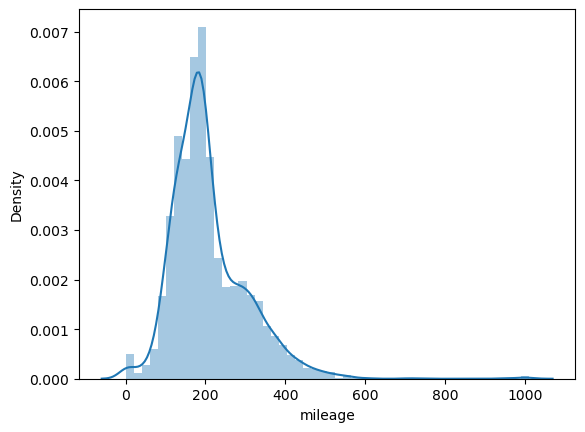

In [18]:
#visualising by density plot

sns.distplot(sqrt_mileage, hist = True)

Note: In the previous case, we got the nan because of zero, but the square root transformation has reduced the skewed values from 7.07 to 1.66. Which is nearer to zero compared to 7.07.

#### Cube Root Transformation

The cube root means x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape,

It is weaker than the logarithm but stronger than the square root transformation.

It is also used for reducing right skewness and has the advantage that it can be applied to zero and negative values. Note that the cube root of a volume has the units of a length. It is commonly applied to rainfall data.

In [19]:
#calculating the cube root for the column

cube_root_mileage = np.cbrt(data['mileage'])

cube_root_mileage.head(5)

0    64.959896
1    57.544590
2    34.082269
3    40.030394
4    18.808793
Name: mileage, dtype: float64

In [20]:
#calculation skewness after calculating the cube root

cube_root_mileage.skew()

0.6866069687334176

/tmp/ipykernel_141/4245078988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cube_root_mileage, hist = True)


<AxesSubplot: xlabel='mileage', ylabel='Density'>

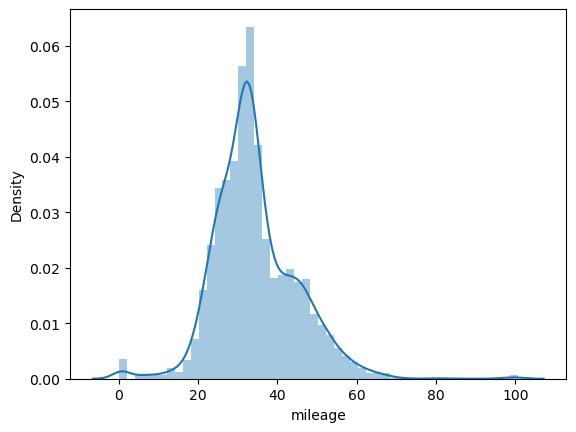

In [21]:
#visualising by density plot

sns.distplot(cube_root_mileage, hist = True)

#### Reciprocals Transformation

The reciprocal, x to 1/x, with its sibling the negative reciprocal, x to -1/x, is a very strong transformation with a drastic effect on distribution shape.

It cannot be applied to zero values. Although it can be applied to negative values, it is not useful unless all values are positive.

For Example: we might want to multiply or divide the results of taking the reciprocal by some constant, such as 100 or 1000, to get numbers that are easy to manage, but that it has no effect on skewness or linearity.

In [22]:
#calculating the reciprocal for the column data[‘mileage’] column

recipr_mileage = np.reciprocal(data['mileage'])

recipr_mileage.head(5)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    0.000004
1    0.000005
2    0.000025
3    0.000016
4    0.000150
Name: mileage, dtype: float64

In [23]:
recipr_mileage.skew()

nan

Note: It’s giving output as nan because there are some values as the zero. In reciprocal transformation, it’s good to deal with negative numbers, not with zero.

#### Left Skewness

let’s create small dataset & have alook on left skewness

In [24]:
Data = [['sameer',10],['pankaj',20],['sam',30],['Hemant',48],['vivek',62],['ram',87],['suman', 93], ['anup',85],['mohit',60],['sandeep',75],['ajeet',84],
['yash',90], ['sam', 99], ['deepak', 92],['vikas', 99],['rajiv',95],['sivam', 94],['akash', 89],['vinod',90],['Kundan',87],['Abhay',99]]

#converting in dataframe

df = pd.DataFrame(Data, columns=['Name', 'Marks'] )

df.head(5)

,Name,Marks
0,sameer,10
1,pankaj,20
2,sam,30
3,Hemant,48
4,vivek,62


/tmp/ipykernel_141/726542231.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Marks'], hist = True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

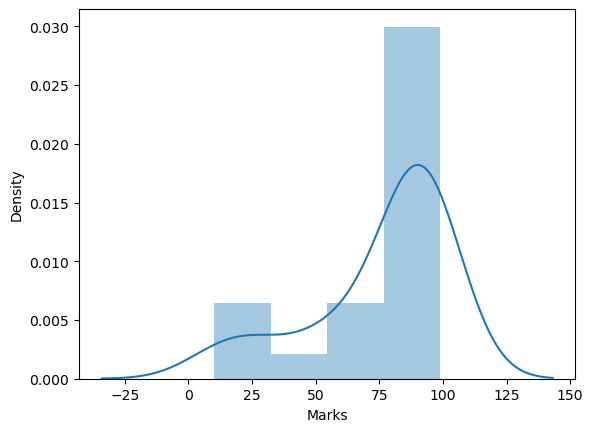

In [25]:
#ploting the Density & histogram plot

import seaborn as sns

sns.distplot(df['Marks'], hist = True)

In [26]:
#checking the skewness

df['Marks'].skew()

-1.4076657771292151

Note: If the skewness is less than -1 and greater than +1 then our data is heavily skewed. Our data is left-skewed here; the skewed value is less than -1. Let’s try to make it symmetric.

#### Squares Transformation

The square, x to x^2, has a moderate effect on distribution shape and it could be used to reduce left skewness.

Squaring usually makes sense only if the variable concerned is zero or positive, given that (-x)^2 and x^2 are identical.

In [27]:
#calculating the square for the column df[‘Marks’]

Square_marks = np.square(df['Marks'])

Square_marks.head(5)

0     100
1     400
2     900
3    2304
4    3844
Name: Marks, dtype: int64

In [28]:
#checking the skewness

Square_marks.skew()

-0.9341854225868288

/tmp/ipykernel_141/3283984340.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Square_marks, hist=True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

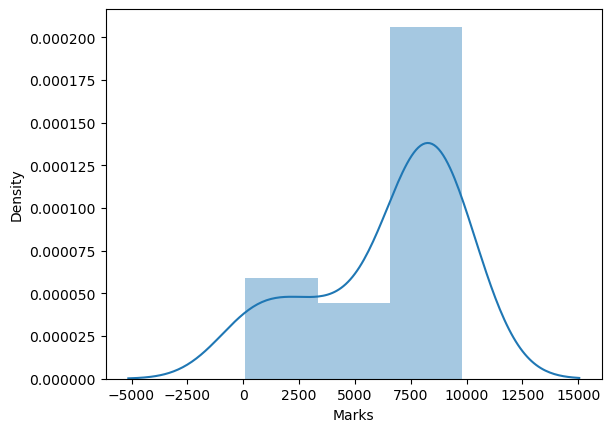

In [29]:
#plotting the density and histogram plot

sns.distplot(Square_marks, hist=True)

Note: After applying the square Transformation, we are getting the skewed value as 0.93. If the skewed value lies in between -1 to 0.5 then data is moderately skewed. Let’s try some other transformation.

#### Cubes Transformation

The cube, x to x³, has a better effect on distribution shape than squaring and it could be used to reduce left skewness.

In [30]:
#calculating the Cubes for the column df[‘Marks’]

cube_marks = np.power(df['Marks'], 3)

cube_marks.head(10)

0      1000
1      8000
2     27000
3    110592
4    238328
5    658503
6    804357
7    614125
8    216000
9    421875
Name: Marks, dtype: int64

In [31]:
#calculating the skewness

cube_marks.skew()

-0.6133662709032679

/tmp/ipykernel_141/2252195515.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cube_marks, hist= True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

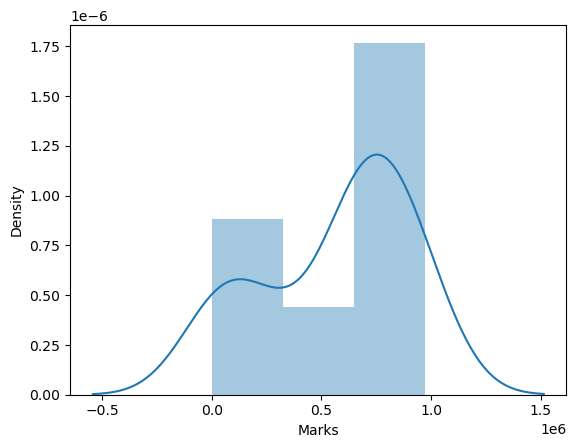

In [32]:
#plotting the density and histogram plot

sns.distplot(cube_marks, hist= True)

Note: After applying the cube transformation, the skewed value is -0.6 , and If the skewed value lies in between -1 to 0.5 then data is moderately skewed. Let’s try some other transformation.

#### Higher Powers

When simple transformation like square and cubes doesn’t reduce the skewness in the data distribution, we can use higher powers to transform to data. It is only useful in left skewness.

In [33]:
higher_power_4 = np.power(df['Marks'], 4)

higher_power_4.head(5)

0       10000
1      160000
2      810000
3     5308416
4    14776336
Name: Marks, dtype: int64

In [34]:
#calculating the skewness

higher_power_4.skew()

-0.3563776896040546

/tmp/ipykernel_141/1819849149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(higher_power_4, hist = True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

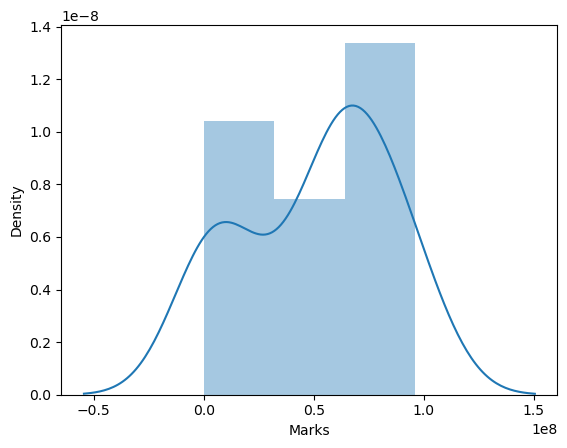

In [35]:
#plotting the density and histogram

sns.distplot(higher_power_4, hist = True)

Note: After applying the higher power (power = 4) the skewness is changed from -1.4 to -0.3. If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. So, finally, we have got the best result and we got the skew value as  -0.3.

In case if we would not have got this skew value still after applying these many powers, we can increase the power to get a better result.

In [36]:
#applying the higher power(power = 5) and calculating the skewness

higher_power_5 = np.power(df['Marks'], 5)

higher_power_5.skew()

-0.12781688683710232

/tmp/ipykernel_141/3093584011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(higher_power_5, hist = True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

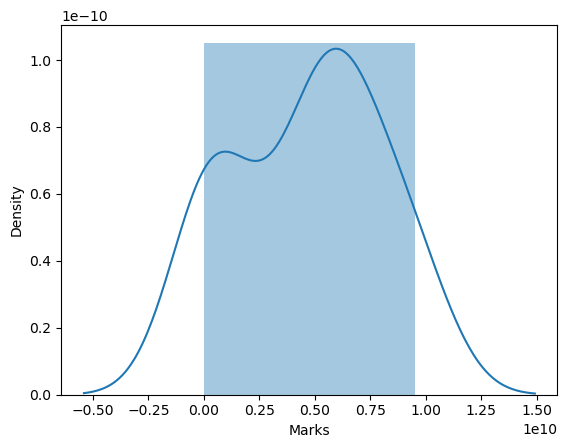

In [37]:
#plotting the density and histogram

sns.distplot(higher_power_5, hist = True)

In [38]:
#applying the higher power(power = 5) and calculating the skewness

higher_power_6 = np.power(df['Marks'], 6)
higher_power_6.skew()

0.08406219634567366

/tmp/ipykernel_141/409573600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(higher_power_6, hist= True)


<AxesSubplot: xlabel='Marks', ylabel='Density'>

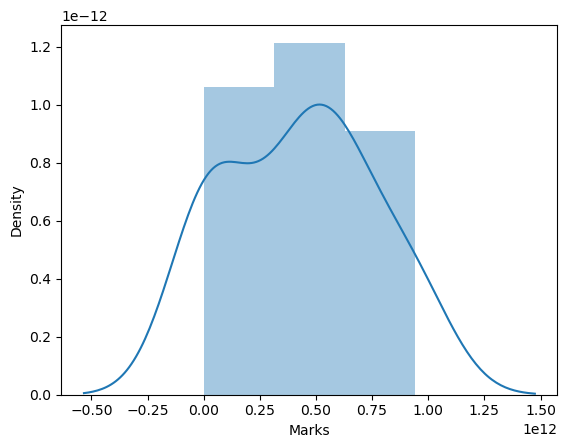

In [39]:
#plotting the density and histogram

sns.distplot(higher_power_6, hist= True)

Note: Finally, we have got the skewed value as 0.08 (almost 0), and we can see the data is not symmetrically distributed.